In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy import nan as NaN

In [2]:
df_ABC_distance = pd.read_excel('data/DZDB4.xlsx',sheet_name="Samples")
df_Data = pd.read_excel('data/DZDB4.xlsx',sheet_name="UPb_Data")
df_ABC_distance = df_ABC_distance.rename(columns={'distance_subduction':'distance'})
SedimentaryZircon = pd.merge(df_ABC_distance,df_Data,on='Ref_Sample_Key')

dataframe_age0 = df_ABC_distance[df_ABC_distance['Est. Depos. Age (Ma)'] == 0]
dataframe_age1 = df_ABC_distance[np.logical_and(df_ABC_distance['Est. Depos. Age (Ma)'] > 0 , df_ABC_distance['Est. Depos. Age (Ma)'] <= 100)]
dataframe_age01 = df_ABC_distance[np.logical_and(df_ABC_distance['Est. Depos. Age (Ma)'] >= 0 , df_ABC_distance['Est. Depos. Age (Ma)'] <= 100)]

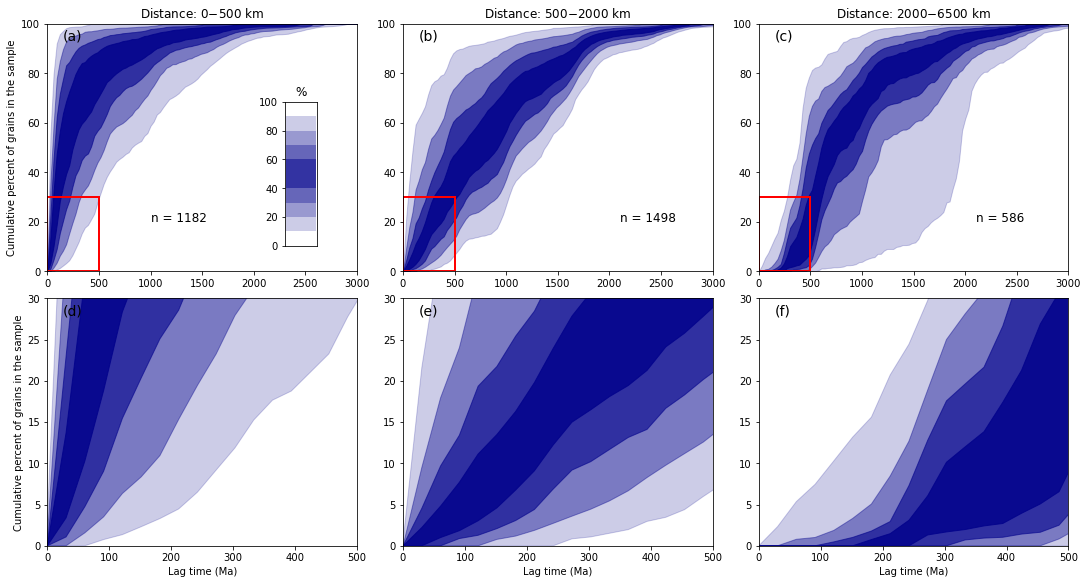

In [40]:
#from scipy.interpolate import make_interp_spline
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,8), constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
#fig.subplots_adjust(hspace=0.1,wspace=0.1)

no_texts1 = ['(a)','(b)','(c)']
no_texts2 = ['(d)','(e)','(f)']
no_texts = [no_texts1, no_texts2]

min_distances = [0,500,2000]
max_distances = [500,2000,6500]

gs1 = [0,1,2]
gs2 = [3,4,5]
gss = [gs1, gs2]
for kkk in [0,1]:
    for i,min_distance in enumerate(min_distances):
        df_new = dataframe_age01[np.logical_and(dataframe_age01['distance'] >= min_distance, dataframe_age01['distance'] < max_distances[i])]
        Sample_Key = df_new['Ref_Sample_Key']
        Sample_Key = Sample_Key.to_list()
        data = []
        count = 0
        ax = fig.add_subplot(gs[gss[kkk][i]])
        for ii, key_i in enumerate(Sample_Key):
            Sample_age = SedimentaryZircon[SedimentaryZircon['Ref_Sample_Key'] == key_i]

            age_list = []
            for ii in Sample_age.index.values:
                if ~np.isnan(Sample_age.loc[ii,'Published 206Pb/238U age (Ma)']):
                    age = Sample_age.loc[ii,'Published 206Pb/238U age (Ma)']
                else:
                    age = Sample_age.loc[ii,'Published 207Pb/206Pb age (Ma)']
                age_list.append(age)
            CA_DA = age_list - Sample_age['Est. Depos. Age (Ma)']     

            CA_DA.dropna(inplace=True)
            if CA_DA.shape[0]>0:
                ecdf = sm.distributions.ECDF(CA_DA)
                x = np.linspace(0, 3000, 100)
                y = ecdf(x)
                #color = cmap(norm(Sample_age['distance'].iloc[0]))
                color = 'grey'
                #ax.step(x, y*100, color = color, alpha=0.2)
                data.append(y*100)
                count = count + 1

        min_time = 0.1
        max_time = 0.9
        y3=np.quantile(data, min_time, axis=0)
        y4=np.quantile(data, max_time, axis=0)
        #ax.plot(x,y3, color = 'orange', alpha=1 , linewidth = 1, linestyle = '--')
        #ax.plot(x,y4, color = 'orange', alpha=1, linewidth = 1, linestyle = '--')
        ax.fill_between(x, y3, y4, color = 'darkblue', alpha=0.2, label='80% contour')
        min_time = 0.2
        max_time = 0.8
        y3=np.quantile(data, min_time, axis=0)
        y4=np.quantile(data, max_time, axis=0)
        ax.fill_between(x, y3, y4, color = 'darkblue', alpha=0.4, label='60% contour')    
        min_time = 0.3
        max_time = 0.7
        y3=np.quantile(data, min_time, axis=0)
        y4=np.quantile(data, max_time, axis=0)
        ax.fill_between(x, y3, y4, color = 'darkblue', alpha=0.6, label='40% contour')      
        min_time = 0.4
        max_time = 0.6
        y3=np.quantile(data, min_time, axis=0)
        y4=np.quantile(data, max_time, axis=0)
        ax.fill_between(x, y3, y4, color = 'darkblue', alpha=0.8, label='20% contour')        
        #y2=np.quantile(data, 0.5, axis=0)
        #ax.plot(x,y2, color = 'darkblue', alpha=1, linewidth = 3)   
        
        ax.text(0.05, 0.92, no_texts[kkk][i],
        verticalalignment='bottom', horizontalalignment='left', transform=ax.transAxes, color='black', fontsize=14) 
        if kkk == 0:
            ax.set_ylim(0,100)
            ax.set_xlim(0,3000)
            ax.set_title('Distance: '+str(min_distance)+'$-$'+str(max_distances[i])+' km')
            #ax.barh(15,500,height=30,edgecolor='black',alpha=0.4)
            vertices = []
            codes = []
            codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
            vertices = [(0, 0), (0, 30), (500, 30), (500, 0), (0, 0)]
            path = Path(vertices, codes)
            pathpatch = PathPatch(path, facecolor='None', edgecolor='red',linewidth = 2)
            ax.add_patch(pathpatch)
            ax.autoscale_view()
            if i == 0:
                ax.text(1000,20, 'n = '+str(count), horizontalalignment='left', size='large', color='black')
                
                plt.axis('on')
                cax = plt.axes([0.26, 0.58 ,0.03, 0.25])
                cax.fill_between([0,0.5],10,color='white', linewidth = 0) 
                cax.fill_between([0,0.5],10,20,color='darkblue', alpha=0.2, edgecolor = 'white', linewidth = 0)
                cax.fill_between([0,0.5],20,30,color='darkblue', alpha=0.4, edgecolor = 'white', linewidth = 0)
                cax.fill_between([0,0.5],30,40,color='darkblue', alpha=0.6, edgecolor = 'white', linewidth = 0)
                cax.fill_between([0,0.5],40,50,color='darkblue', alpha=0.8, edgecolor = 'white', linewidth = 0)
                cax.fill_between([0,0.5],50,60,color='darkblue', alpha=0.8, edgecolor = 'white', linewidth = 0)
                cax.fill_between([0,0.5],60,70,color='darkblue', alpha=0.6, edgecolor = 'white', linewidth = 0)
                cax.fill_between([0,0.5],70,80,color='darkblue', alpha=0.4, edgecolor = 'white', linewidth = 0)
                cax.fill_between([0,0.5],80,90,color='darkblue', alpha=0.2, edgecolor = 'white', linewidth = 0)
                #cax.fill_between([0,0.5],90,color='white') 
                cax.set_ylim(0,100)
                cax.set_xticks([])   
                cax.set_title('%')
            else:
                ax.text(2100,20, 'n = '+str(count), horizontalalignment='left', size='large', color='black')
            #ax.set_xticklabels([])
        else:
            ax.set_ylim(0,30)
            ax.set_xlim(0,500)
            ax.set_xlabel('Lag time (Ma)')
            #if i == 0:
                #ax.legend(loc=4) # 指定legend的位置
        if i == 0:
            ax.set_ylabel('Cumulative percent of grains in the sample')
        #else:
            #ax.set_yticklabels([])
#plt.tight_layout()
fig.savefig('plots/figures/Figure3.pdf')
fig.savefig('plots/figures/Figure3.png', dpi=600)
plt.show()